## 네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.

(용도는 전체, 카테고리별(별 1000개) 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)

- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
        
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성

## 1. 파일 불러와서 데이터프레임으로 만들기

In [1]:
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
  
df = pd.read_json('news_df')
df.head()

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264


## 2. 데이터프레임 분석

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054 entries, 0 to 3053
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   news      3054 non-null   object
 1   category  3054 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 71.6+ KB


In [3]:
df.describe()

,category
count,3054.000000
mean,253.051735
std,14.641740
min,227.000000
25%,242.000000
50%,259.000000
75%,264.000000
max,283.000000


In [4]:
df.category.unique() # 총 18개 서브 카테고리

array([264, 265, 267, 268, 259, 258, 261, 262, 260, 241, 237, 242, 248,
       245, 227, 230, 283, 228], dtype=int64)

In [5]:
duplicated = df[df.duplicated(subset=['news'])]
duplicated.info() # 총 872 중복 행

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 37 to 3053
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   news      872 non-null    object
 1   category  872 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


## 3. 전처리 : 중복 제거

In [6]:
df.drop_duplicates(inplace = True) 
df.reset_index(drop=True,inplace = True) # 인덱스 리셋

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2323 entries, 0 to 2322
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   news      2323 non-null   object
 1   category  2323 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 36.4+ KB


In [8]:
df.head()

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264


### 정규표현식한 후 명사만 추출 

In [9]:
from konlpy.tag import Okt
import re

for i in range(len(df)): # df 의 행 수만큼 for 문 돌린다.
    news = df.loc[i,'news'] # news 컬럼만의 각 값을 순서대로 가져온다.
    news =  re.findall('[가-힣]+|[가-힣]+\d+|\d+[가-힣]+',news)    # 가져온 행의 값에서 정규표현식 수행 # 영어 추가..\w
    news = ' '.join(news) # 위에서는 한글과 숫자만 추출된 요소들이 list 안에 있으니 전부를 하나로 묶어줌, 이때 스페이스로 분리
    news = re.sub('^\s+|\s+$|\s{2,}','',news) # 불필요한 공백들을 전부 제거

    okt = Okt()
    morph = okt.pos(news)
    noun_list = []
    for word, tag in morph:
        if (tag=='Noun') & (len(word) > 1):# 형용사 
            noun_list.append(word)
    noun_list= ' '.join(noun_list)
    
    df.loc[i,'news']= noun_list

In [10]:
df.head()

,news,category
0,대통령 기업 활동 위축 과도 형벌 규정 개선 지시,264
1,국방부 유엔 판문점 통과 허용 북송 승인 의미,264
2,포토 육군 대규모 항공 작전 훈련,264
3,유럽 아세안 정상 비즈니스 외교 시작,264
4,국내 종단 지도자 이명박 이재용 김경수 통큰 사면 요청,264


## 5. 카테고리별 데이터프레임 만들기

In [11]:
df # 전체 
cat_100_df = df.loc[df['category'].isin([264,265,268,267])] # 정치
cat_101_df = df.loc[df['category'].isin([259,258,261,262,260])] # 경제
cat_103_df = df.loc[df['category'].isin([241,237,242,248,245])] # 생활/문화
cat_105_df = df.loc[df['category'].isin([227,230,283,228])] #IT/과학

In [12]:
# 결과 확인
print(cat_100_df.category.unique())
cat_100_df.head()

[264 265 267 268]


,news,category
0,대통령 기업 활동 위축 과도 형벌 규정 개선 지시,264
1,국방부 유엔 판문점 통과 허용 북송 승인 의미,264
2,포토 육군 대규모 항공 작전 훈련,264
3,유럽 아세안 정상 비즈니스 외교 시작,264
4,국내 종단 지도자 이명박 이재용 김경수 통큰 사면 요청,264


In [13]:
cat_100_df['main_cat'] = 'politics'
cat_101_df['main_cat'] = 'economy'
cat_103_df['main_cat'] = 'life/culture'
cat_105_df['main_cat'] = 'IT/science'
new_df = pd.concat([cat_100_df,cat_101_df,cat_103_df,cat_105_df])
new_df.main_cat.unique()

array(['politics', 'economy', 'life/culture', 'IT/science'], dtype=object)

<AxesSubplot:xlabel='main_cat'>

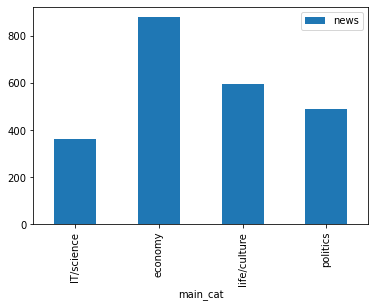

In [14]:
pd.pivot_table(new_df, 
                 index= 'main_cat',
                 values = 'news',
                 aggfunc= 'count' ).plot.bar()

## 6. 카테고리별 워드클라우드

### 전체 

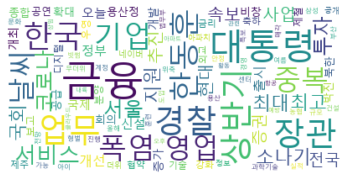

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(df['news'].values) # news 컬럼에 있는 텍스트를 연결하기
nouns = nouns.split() # 단어가 스페이스로 구분되어 있기 때문에

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 정치

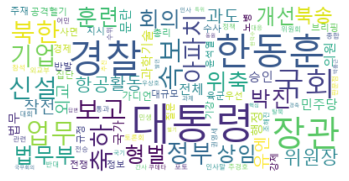

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(cat_100_df['news'].values)
nouns = nouns.split()

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 경제

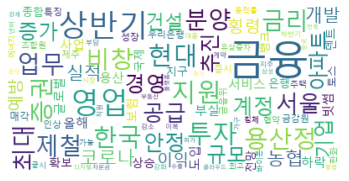

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(cat_101_df['news'].values)
nouns = nouns.split()

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 생활/문화

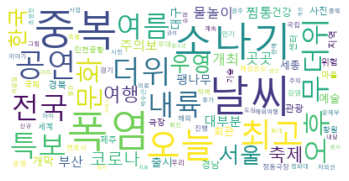

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(cat_103_df['news'].values)
nouns = nouns.split()

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### IT/과학

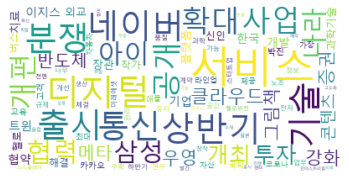

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nouns = ' '.join(cat_105_df['news'].values)
nouns = nouns.split()

word_cloud_lst = Counter(nouns)
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf',max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(word_cloud_lst)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()